# Introduction

This notebook is dedicated to the data processing of the laboratory rhizotron experiment. 
Here the code looks at the current density distribution as a result of a MALM injection into the plant. Two inversions are required: ERT inversion and Inversion of Current density.

The workflow has been integrated directly into the Resipy open-code widely used by the geophysical community.


# Processing

In [1]:
import os
import matplotlib.pyplot as plt

#!pip install resipy
import resipy
from resipy import Project
import numpy as np

API path =  E:\Padova\Software\InversionERT\resipy\src\resipy
ResIPy version =  3.2.3
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


In [2]:
main = 'E:/Padova/Experiments/2020_Rhizotron_Veronika_PRD_vitis_EIT/test-ICSD-API/'

inputfileERT = 'ERT_0113.csv' #'ERT_1217.csv'
inputfileMALM = 'MALM_0113.csv' #'MALM_1217.csv'
elecs = np.genfromtxt(main + 'mesh/elecsXYZ.csv', delimiter=",",skip_header=1)

C:\Users\gcass\anaconda3\envs\pygimli\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Working directory is: E:\Padova\Experiments\2020_Rhizotron_Veronika_PRD_vitis_EIT\test-ICSD-API
clearing dirname
4968/4968 reciprocal measurements found.
40 measurements error > 20 %
removeUnpaired:filterData: 0 / 4968 quadrupoles removed.
148 measurements with greater than 10.0% reciprocal error removed!
Error model is R_err = 0.027*R_avg + 0.014 (R^2 = 0.879)


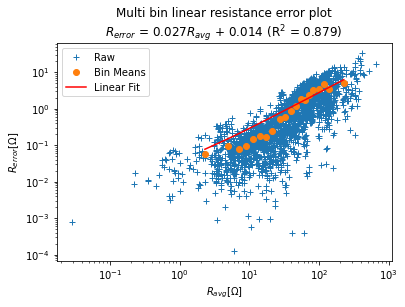

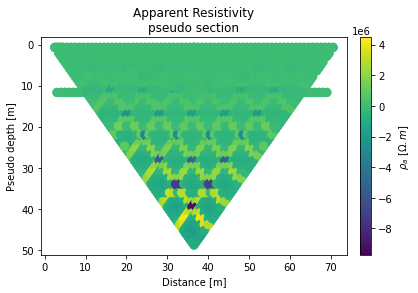

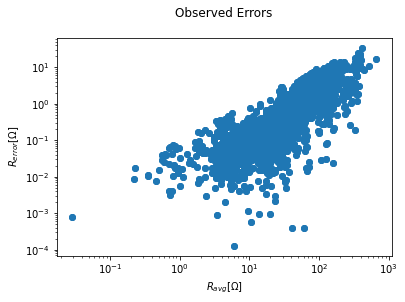

In [3]:
k = Project(main, typ='R3t')
k.createSurvey(main + '/raw_data/' + inputfileERT, ftype='Syscal') # read the survey file
k.filterUnpaired()
k.filterRecip(percent=10) # in this case this only removes one quadrupoles with reciprocal error bigger than 20 percent
k.fitErrorLin()
k.showPseudo()
k.showError() # plot the reciprocal errors
elecsFlag = np.concatenate([np.zeros(8),np.ones(len(elecs[:,2])-8)])
k.setElec(np.c_[elecs[:,0],elecs[:,2],elecs[:,1],elecsFlag])

In [4]:
k.importMesh(main + 'mesh/mesh_rhizo_resipy.msh')
k.param['num_xy_poly'] = 0
k.param['z_min'] = -100
k.param['z_max'] = 100
k.param['data_type'] = 1 # using log of resistitivy
k.err = True # if we want to use the error from the error models fitted before
# k.invert() # this will do the inversion

C:\Users\gcass\anaconda3\envs\pygimli\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Reading E:/Padova/Experiments/2020_Rhizotron_Veronika_PRD_vitis_EIT/test-ICSD-API/mesh/mesh_rhizo_resipy.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Tetrahedra
Reading connection matrix...
ignoring 0 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file


In [5]:
k.createSurveyCSD(main + '/raw_data/' + inputfileMALM, ftype='Syscal')
grid_vrte = [(0.1, 0.3, 3),(0,0,1),(0.125,0.425,4)]

Survey.filterDefault: 3 duplicates removed.

0/297 reciprocal measurements found.
0/297 reciprocal measurements found.


In [6]:
# Inversion of CSD
k.invertCSD(grid=grid_vrte, x0=None, weightType='const', wreg=1)
k.showCSD()

!!!WARNING the implementation of this method needs to be checked!!!
default to mesh
Running simulations...

C:\Users\gcass\anaconda3\envs\pygimli\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: both dx and dy equal 0 - check no 2 electrodes occupy same xy coordinates